<a href="https://colab.research.google.com/github/changsksu/IMSE_Data_Science/blob/main/Interaction_Plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This notebook demonstrates how to generate an interaction plot of two main effects.
The dataset is from Montgomery etch rate data in Chap 13 (Table 18.18 on page 598 7ed).

Ref. https://www.statsmodels.org/devel/generated/statsmodels.graphics.factorplots.interaction_plot.html

In [43]:
import math
import random
import scipy
import statistics
import numpy as np
import scipy.stats
from scipy.special import comb
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import plotly.graph_objects as go
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp as mc
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from statsmodels.graphics.factorplots import interaction_plot

In [44]:
#Data Set (Table 18.18 on page 598 7ed)
df = pd.read_csv('https://raw.githubusercontent.com/changsksu/KState_IMSE541/main/EX%2013.8%20Etch%20Rate%20k%3D4%20cpts.csv', sep=',', na_values=".")

df

,stand_order,run_order,A_Gap,B_Pressure,C_Flow,D_Power,EtchRate
0,1,10,-1,-1,-1,-1,550
1,2,13,1,-1,-1,-1,669
2,3,7,-1,1,-1,-1,604
3,4,3,1,1,-1,-1,650
4,5,9,-1,-1,1,-1,633
5,6,14,1,-1,1,-1,642
6,7,1,-1,1,1,-1,601
7,8,11,1,1,1,-1,635
8,9,16,-1,-1,-1,1,1037
9,10,4,1,-1,-1,1,749


In [45]:
# grabing data without the center points
# only A & D are significant; see the 2k fractional ipynb
response_data = df['EtchRate'][df['D_Power'] !=0]
A=df['A_Gap'][df['D_Power'] !=0]
D=df['D_Power'][df['D_Power'] !=0]

# Interaction plot

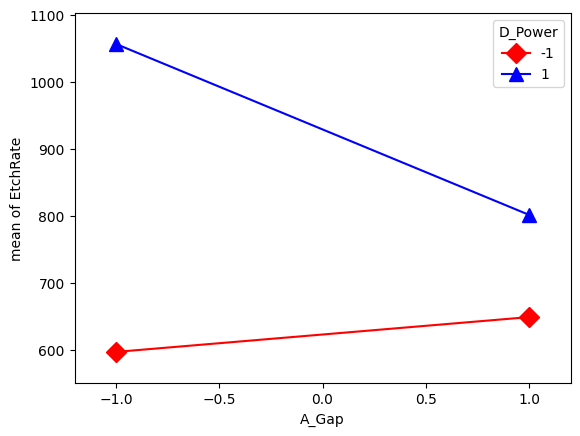

In [46]:
# in interaction_plot the first argument is the X axis, the 2nd argument is the series to be plotted
# the third argument is the response data
# if there are three levels, then colors and markers need three arguments
fig = interaction_plot(A, D, response_data,
           colors=['red','blue'], markers=['D','^'], ms=10)
import matplotlib.pyplot as plt
plt.show()

# Main Effect Plot by Hand

Note that 1 is at low and 2 is at hi level
Two main effect A and B are shown
A: 10 is the sum of all low; 20 is the sum of all hi
B: 15 is the sum of all low; 10 is the sum of all hi

Ref. https://community.plotly.com/t/how-to-create-main-effects-plot/41441

In [47]:
# in this example both main effect A and B are plotted but the main effects are provided not computed
# 1 and 2 are used instead of -1 and +1
fig = go.Figure()

fig.add_trace(go.Scatter(

x=[["A","A",None,"B","B"],[1,2,None,1,2]],

y=[10, 20, None, 15, 10],

connectgaps=False
))

fig.show()

**Your turn: Can you update the main effect of A and D in the above main effect plot?**